c:\users\anhch\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


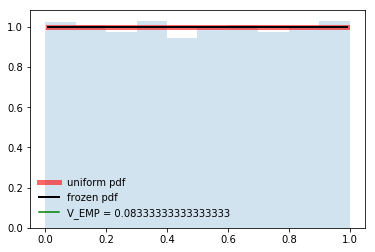

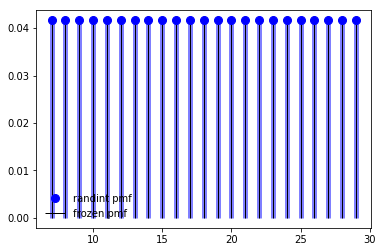

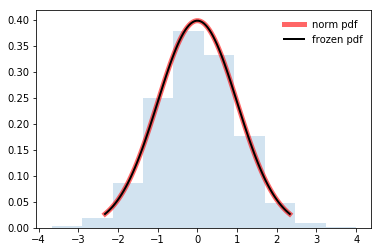

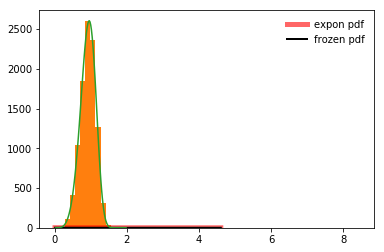

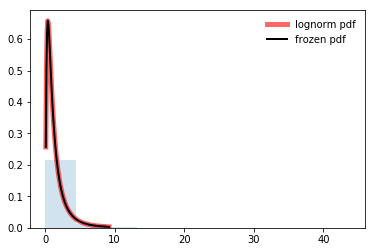

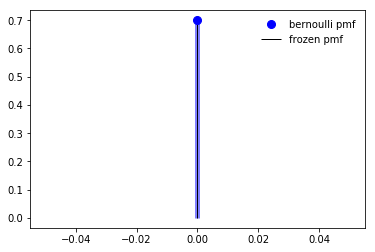

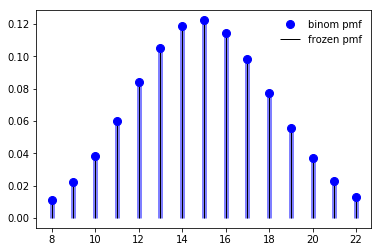

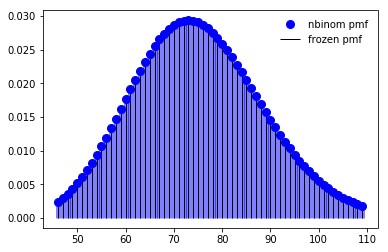

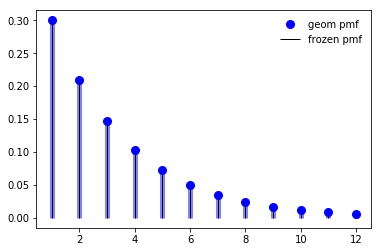

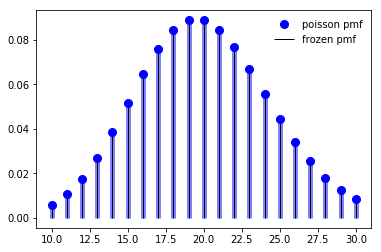

In [2]:
# -*- coding: utf-8 -*-
"""
Éditeur de Spyder

Ceci est un script temporaire.
"""

import numpy as np

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import expon
from scipy.stats import nbinom
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import lognorm
from scipy.stats import randint
from matplotlib.patches import Rectangle

import matplotlib.pyplot as plt

# ============================================= #
# ================= CONSTANTES ================ #
# ============================================= #
TAILLE_ECHANTILLON = 10000

# ============================================= #
# =================== LOIS ==================== #
# ============================================= #

### Rappels d'acronymes pour le fichier script
# PDF  = Probability Density Function
# .pdf == Methode de la densite de probabilite associee a la loi
# .cdf == Methode de la distribution cumulee associee a la loi
# .ppf == Inverse de CDF : Percent Point Function

### .plot() : Permet de tracer un graphe (x,y) suivant des options determinees
# 'r' est la couleur rouge du tracer
# 'k' est la couleur noire du tracer
# 'lw' = 'linewidth'


# ============================================= #
# >>>>>>>>>>>>> UNIFORME CONTINUE <<<<<<<<<<<<< #
# ============================================= #

fig, ax = plt.subplots(1, 1)

#### Calcul de différentes valeurs statistiques
# mean, variance, skew & kurtosis
# = moyenne, variance, coef d'asymétrie, coef d'aplatissement
mean, var, skew, kurt = uniform.stats(moments='mvsk')

# Création d'un ensemble de valeurs équitablement espacées
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)

ax.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')


# L'appel de la fonction permet de recevoir une version 'frozen' de la PDF
rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = uniform.ppf([0.001, 0.5, 0.999])

# Return True ou False si les elements sont d'un vecteur sont egaux (a tolerance pres)
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))


# Retourne des variables aleatoires
r = uniform.rvs(size=TAILLE_ECHANTILLON)

# Permet d'afficher l'esperance et la variance
str_esp_var_emp  = "V_EMP = " + str(uniform.var())
ax.plot([], [], "g", label=str_esp_var_emp)

# Histogramme
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)


# ============================================= #
# ============= UNIFORME DISCRETE ============= #
# ============================================= #
fig, ax = plt.subplots(1, 1)

low, high = 7, 31
mean, var, skew, kurt = randint.stats(low, high, moments='mvsk')

x = np.arange(randint.ppf(0.01, low, high), randint.ppf(0.99, low, high))
ax.plot(x, randint.pmf(x, low, high), 'bo', ms=8, label='randint pmf')
ax.vlines(x, 0, randint.pmf(x, low, high), colors='b', lw=5, alpha=0.5)

rv = randint(low, high)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)



# ============================================= #
# ================== NORMALE ================== #
# ============================================= #
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

r = norm.rvs(size=TAILLE_ECHANTILLON)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)



# ============================================= #
# =============== EXPONENTIELLE =============== #
# ============================================= #
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = expon.stats(moments='mvsk')
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

r = expon.rvs(size=TAILLE_ECHANTILLON)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)




# ============================================= #
# =================== WEIBULL ================= #
# ============================================= #

a = 5. # shape
s = np.random.weibull(a, TAILLE_ECHANTILLON)
import matplotlib.pyplot as plt
x = np.arange(1,100.)/50.
def weib(x,n,a):
	return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

count, bins, ignored = plt.hist(np.random.weibull(5.,TAILLE_ECHANTILLON))
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 1., 5.).max()
plt.plot(x, weib(x, 1., 5.)*scale)



# ============================================= #
# ================= LOGNORMALE ================ #
# ============================================= #
fig, ax = plt.subplots(1, 1)

s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')


x = np.linspace(lognorm.ppf(0.01, s), lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s), 'r-', lw=5, alpha=0.6, label='lognorm pdf')

rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))

r = lognorm.rvs(s, size=TAILLE_ECHANTILLON)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)




# ============================================= #
# ================== BERNOULLI ================ #
# ============================================= #
fig, ax = plt.subplots(1, 1)

p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

x = np.arange(bernoulli.ppf(0.01, p), bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)




# ============================================= #
# ================== BINOMIALE ================ #
# ============================================= #
fig, ax = plt.subplots(1, 1)

n, p = 50, 0.3
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)



# ============================================= #
# ============= BINOMIALE NEGATIVE ============ #
# ============================================= #
fig, ax = plt.subplots(1, 1)


n, p = 50, 0.4
mean, var, skew, kurt = nbinom.stats(n, p, moments='mvsk')


x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)


rv = nbinom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)



# ============================================= #
# ================= GEOMETRIQUE =============== #
# ============================================= #
fig, ax = plt.subplots(1, 1)

p = 0.3
mean, var, skew, kurt = geom.stats(p, moments='mvsk')

x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
ax.plot(x, geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = geom(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)



# ============================================= #
# =================== POISSON ================= #
# ============================================= #
fig, ax = plt.subplots(1, 1)

mu = 20
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')


x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')


ax.legend(loc='best', frameon=False)




# ==================== SHOW =================== #
plt.show()

